<a href="https://colab.research.google.com/github/ife-dolapo/IntroToAI/blob/main/Assignment_6_House_Price_Prediction_Using_California_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Task 2: Data Collection and Loading
# Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `fetch_california_housing()` from `sklearn.datasets`
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame


In [ ]:
# Task 3: Quick Check of Data
# Display the first few rows of the dataset
print("First few rows of the dataset")
print(df.head())

# Check the features and target variable
print("\nFEATURES AND TARGET VARIABLE")
print("The columns in the dataset:")
print(df.columns)
print()
print(df.info())
print("\nSummary Statistics of the dataset")
print(df.describe())


First few rows of the dataset
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

FEATURES AND TARGET VARIABLE
The columns in the dataset:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null C


Missing Values
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


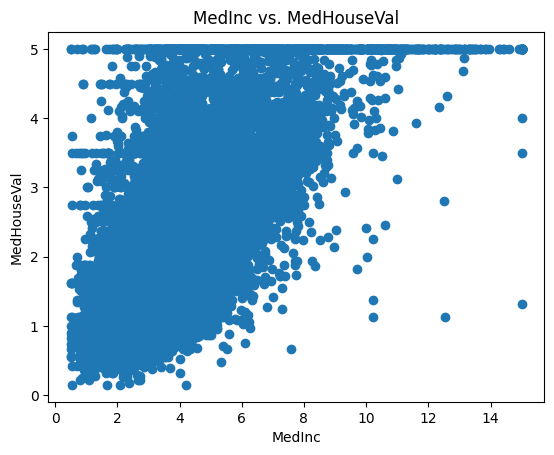

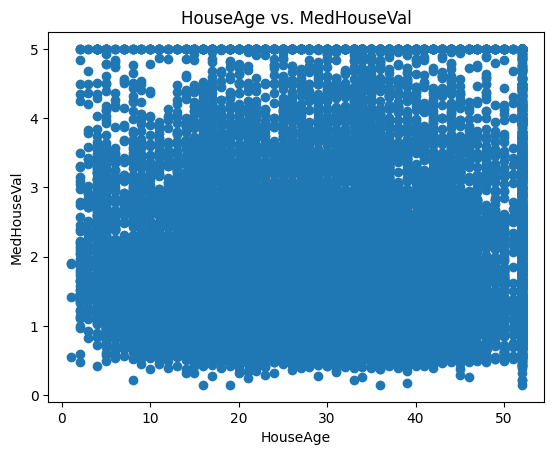

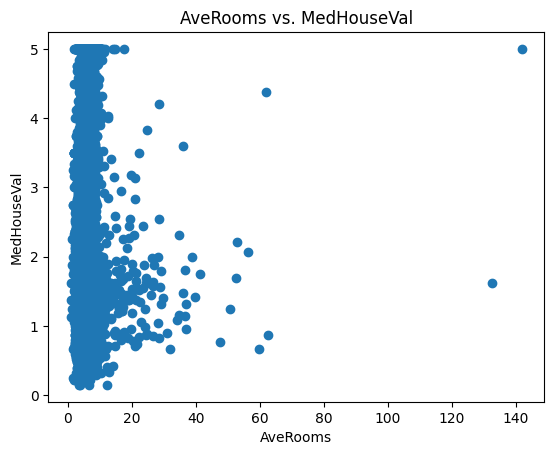

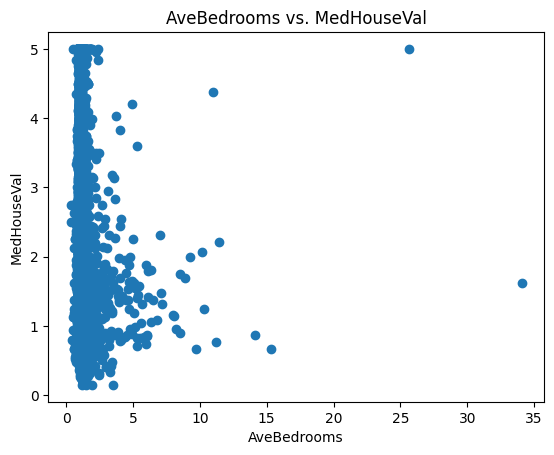

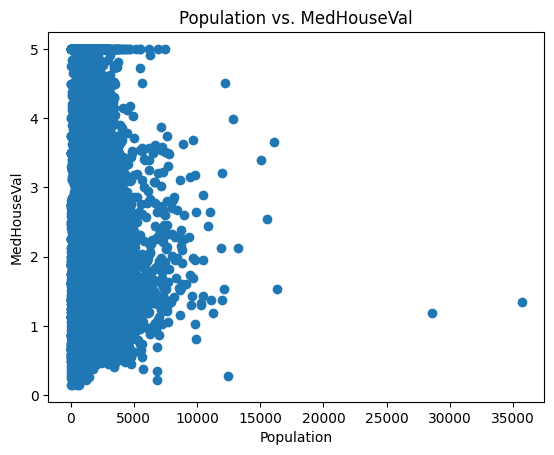

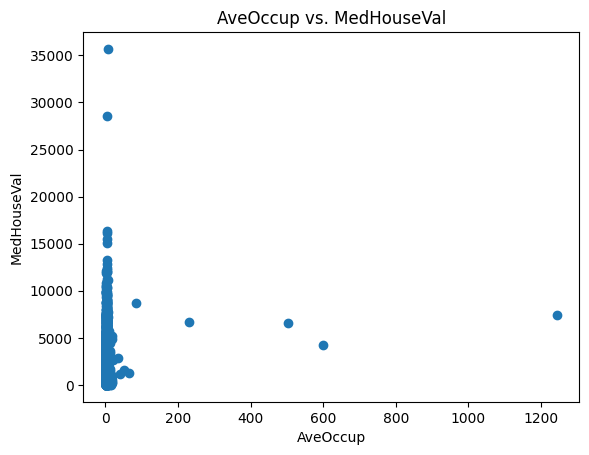

In [ ]:
# Task 4:EDA and Data Preprocessing:
# Check for missing/null values
print("\nMissing Values")
print(df.isnull().sum())

# Visualize the data.
# Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('MedInc vs. MedHouseVal')
plt.show()
print()

plt.scatter(df['HouseAge'], df['MedHouseVal'])
plt.xlabel('HouseAge')
plt.ylabel('MedHouseVal')
plt.title('HouseAge vs. MedHouseVal')
plt.show()
print()

plt.scatter(df['AveRooms'], df['MedHouseVal'])
plt.xlabel('AveRooms')
plt.ylabel('MedHouseVal')
plt.title('AveRooms vs. MedHouseVal')
plt.show()
print()

plt.scatter(df['AveBedrms'], df['MedHouseVal'])
plt.xlabel('AveBedrooms')
plt.ylabel('MedHouseVal')
plt.title('AveBedrooms vs. MedHouseVal')
plt.show()
print()

plt.scatter(df['Population'], df['MedHouseVal'])
plt.xlabel('Population')
plt.ylabel('MedHouseVal')
plt.title('Population vs. MedHouseVal')
plt.show()
print()

plt.scatter(df['AveOccup'], df['Population'])
plt.xlabel('AveOccup')
plt.ylabel('MedHouseVal')
plt.title('AveOccup vs. MedHouseVal')
plt.show()





In [ ]:
# Task 4 Continued
# Create a function to automate scatter plots for all features vs MedHouseVal
def plot_features_vs_target(df, feature,target='MedHouseVal', figsize=(15, 12)):
    """
    Plots scatter plots of one feature in the DataFrame against the target column.

    Parameters:
    - df: pandas DataFrame containing features and target
    - feature: name of the feature column to plot against the target
    - target_column: name of the target column (default: 'MedHouseVal')
    - figsize: size of the entire figure
    """
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' or '{target} not found in the DataFrame.")
        return

    plt.figure(figsize=figsize)
    plt.scatter(df[feature], df[target], alpha=0.5)
    corr = df[feature].corr(df[target])
    plt.title(f'{feature} vs {target}\nCorrelation: {corr:.2f}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Scatter plots of MedHousVal vs MedInc


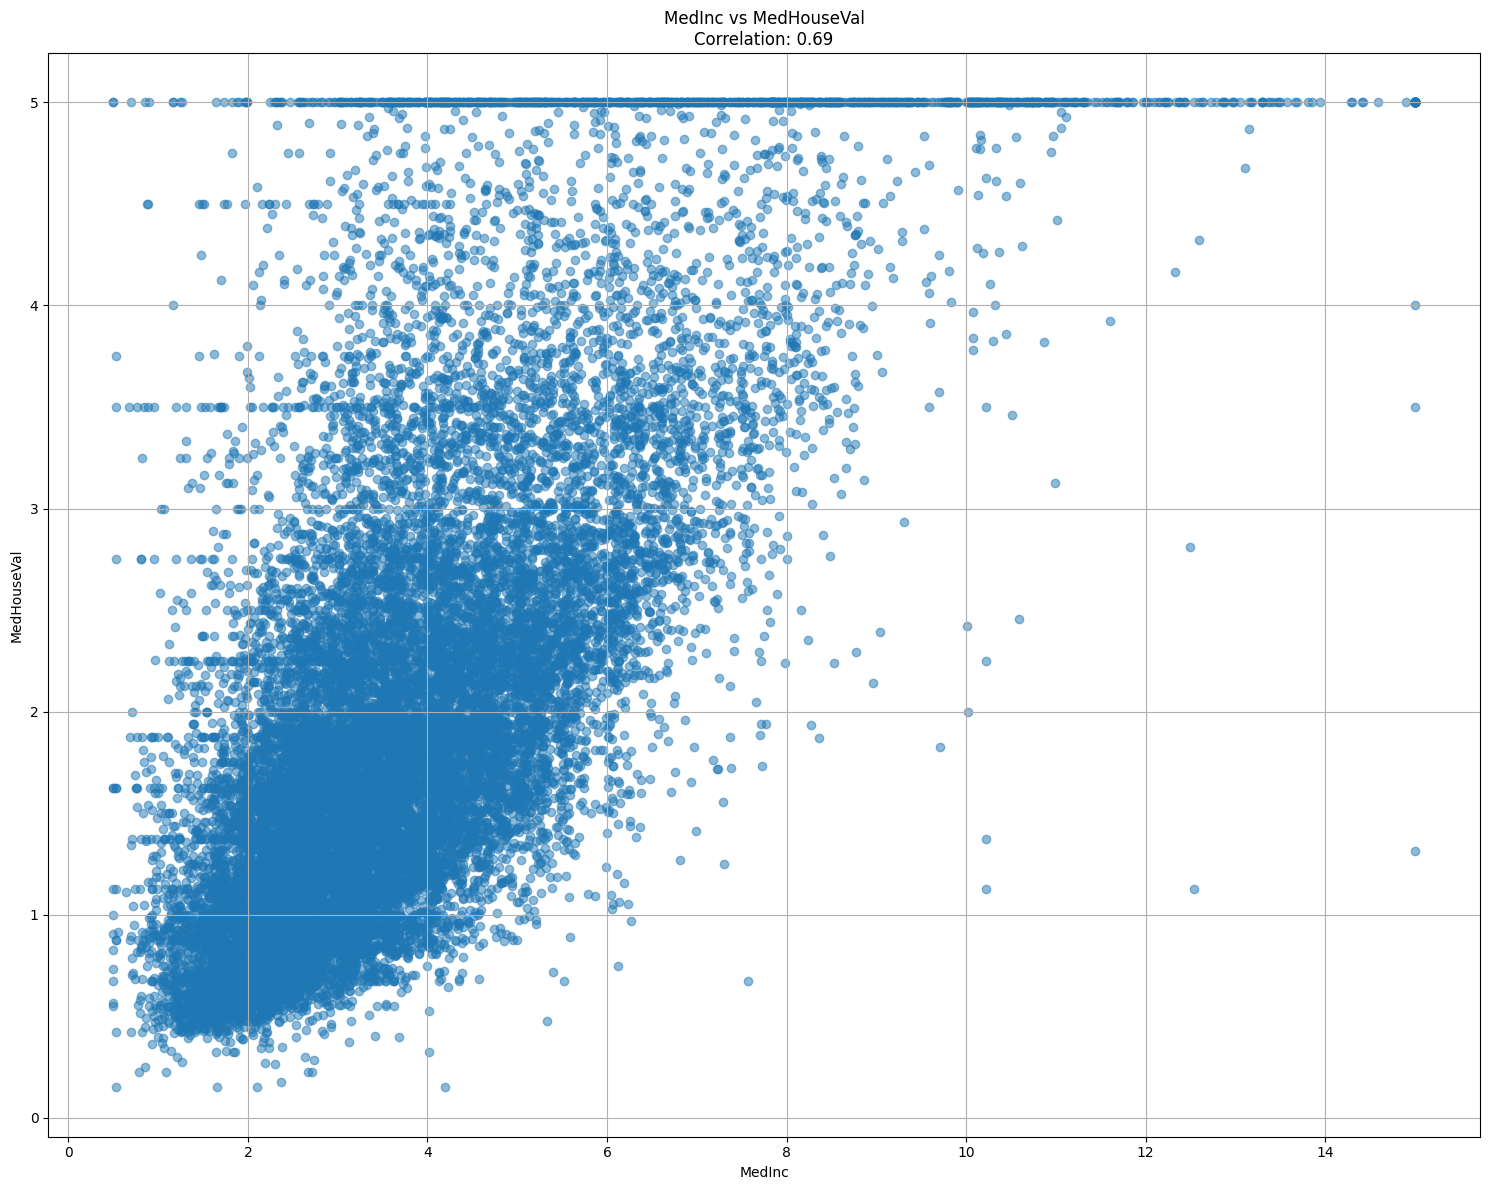


Scatter plots of MedHousVal vs AveRooms


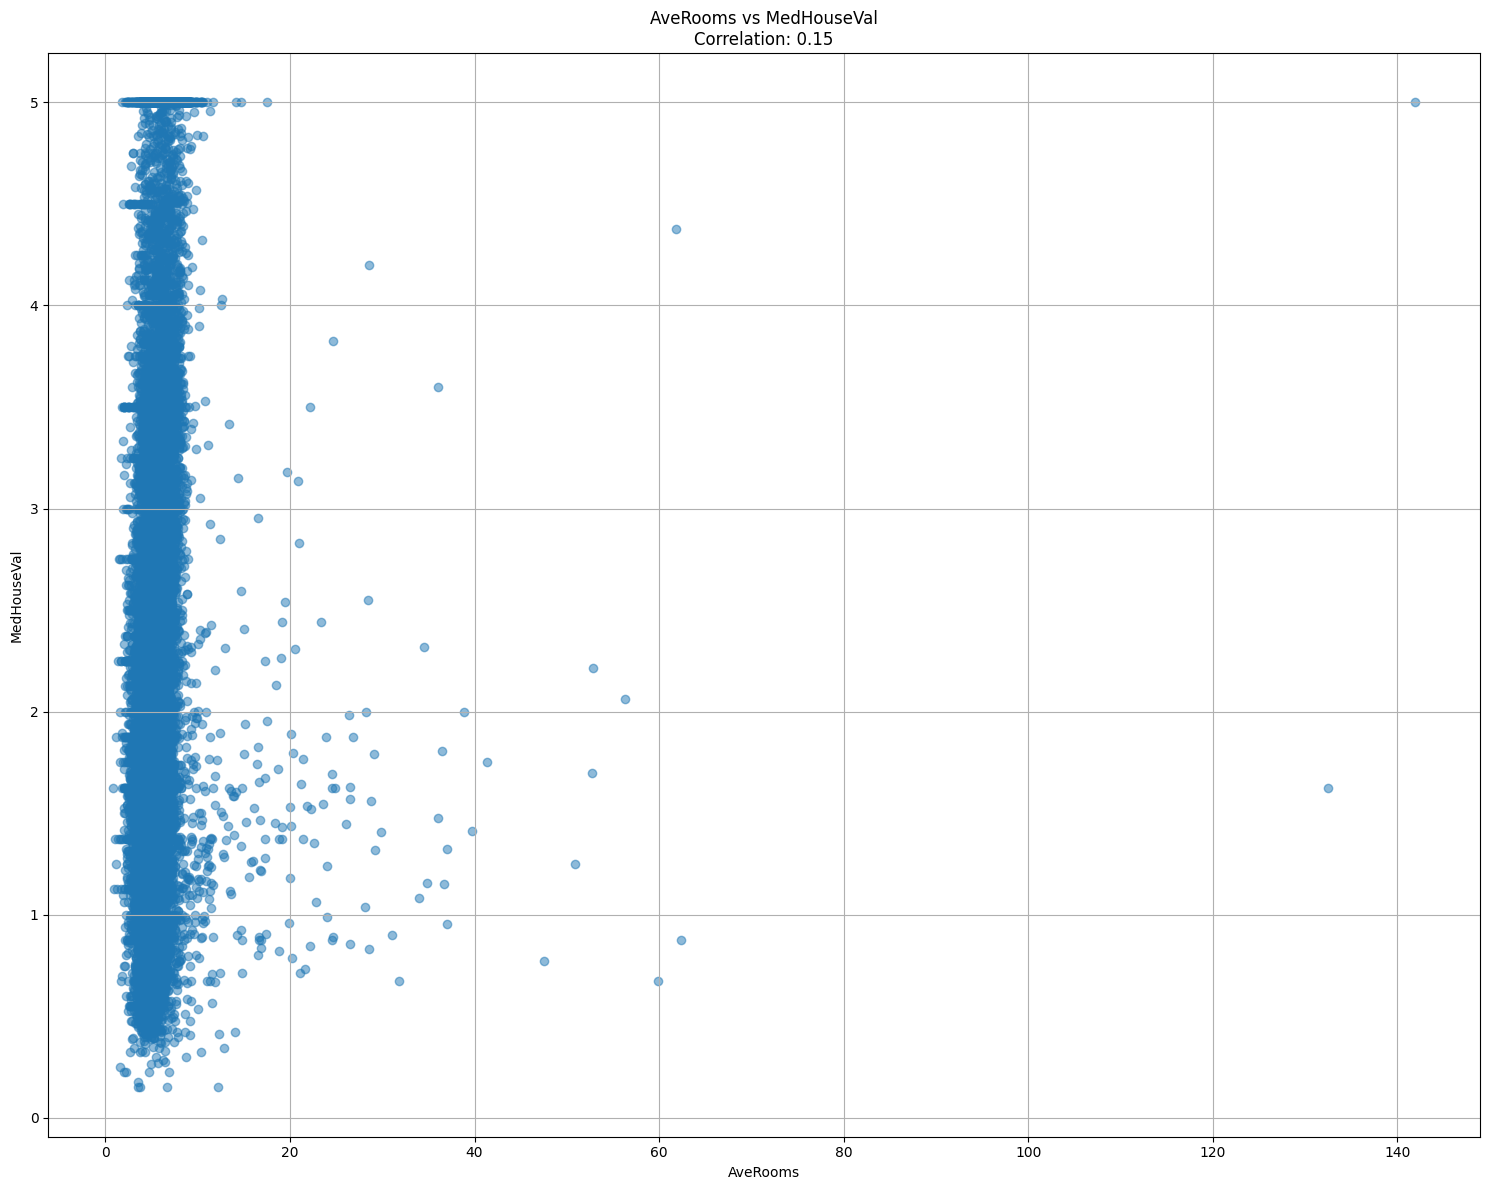


Scatter plots of MedHousVal vs AveOccup


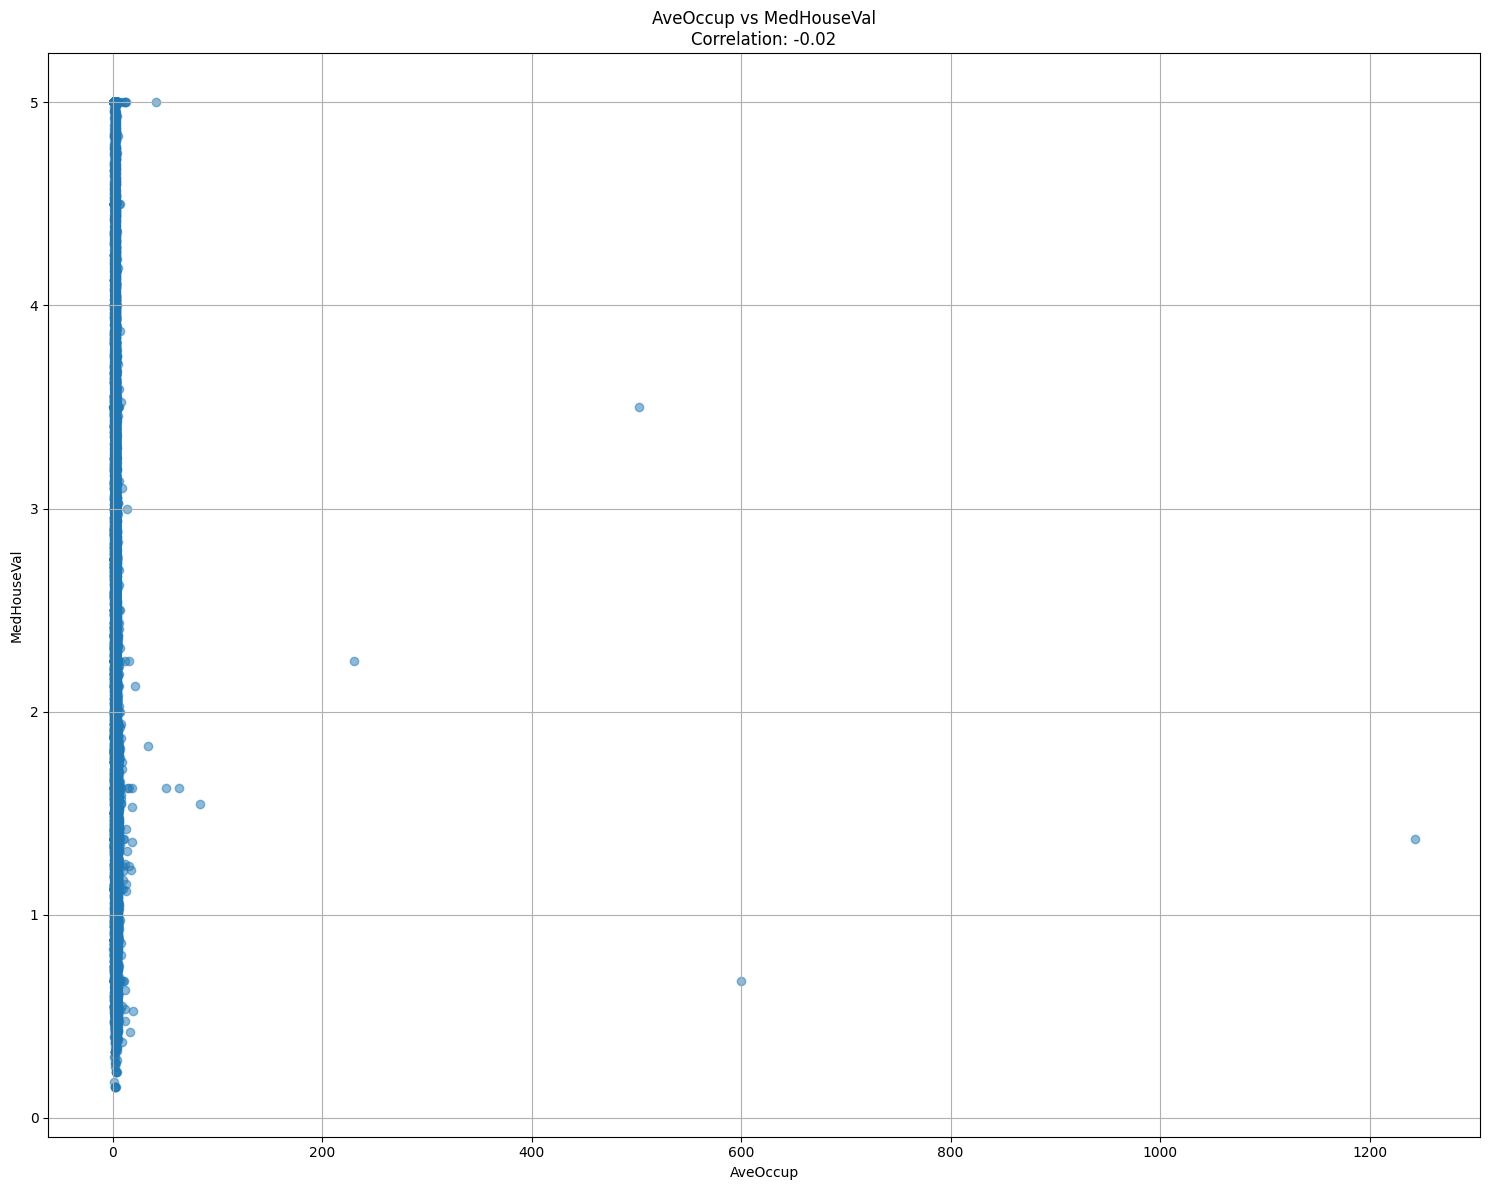


Scatter plots of MedHousVal vs HouseAge


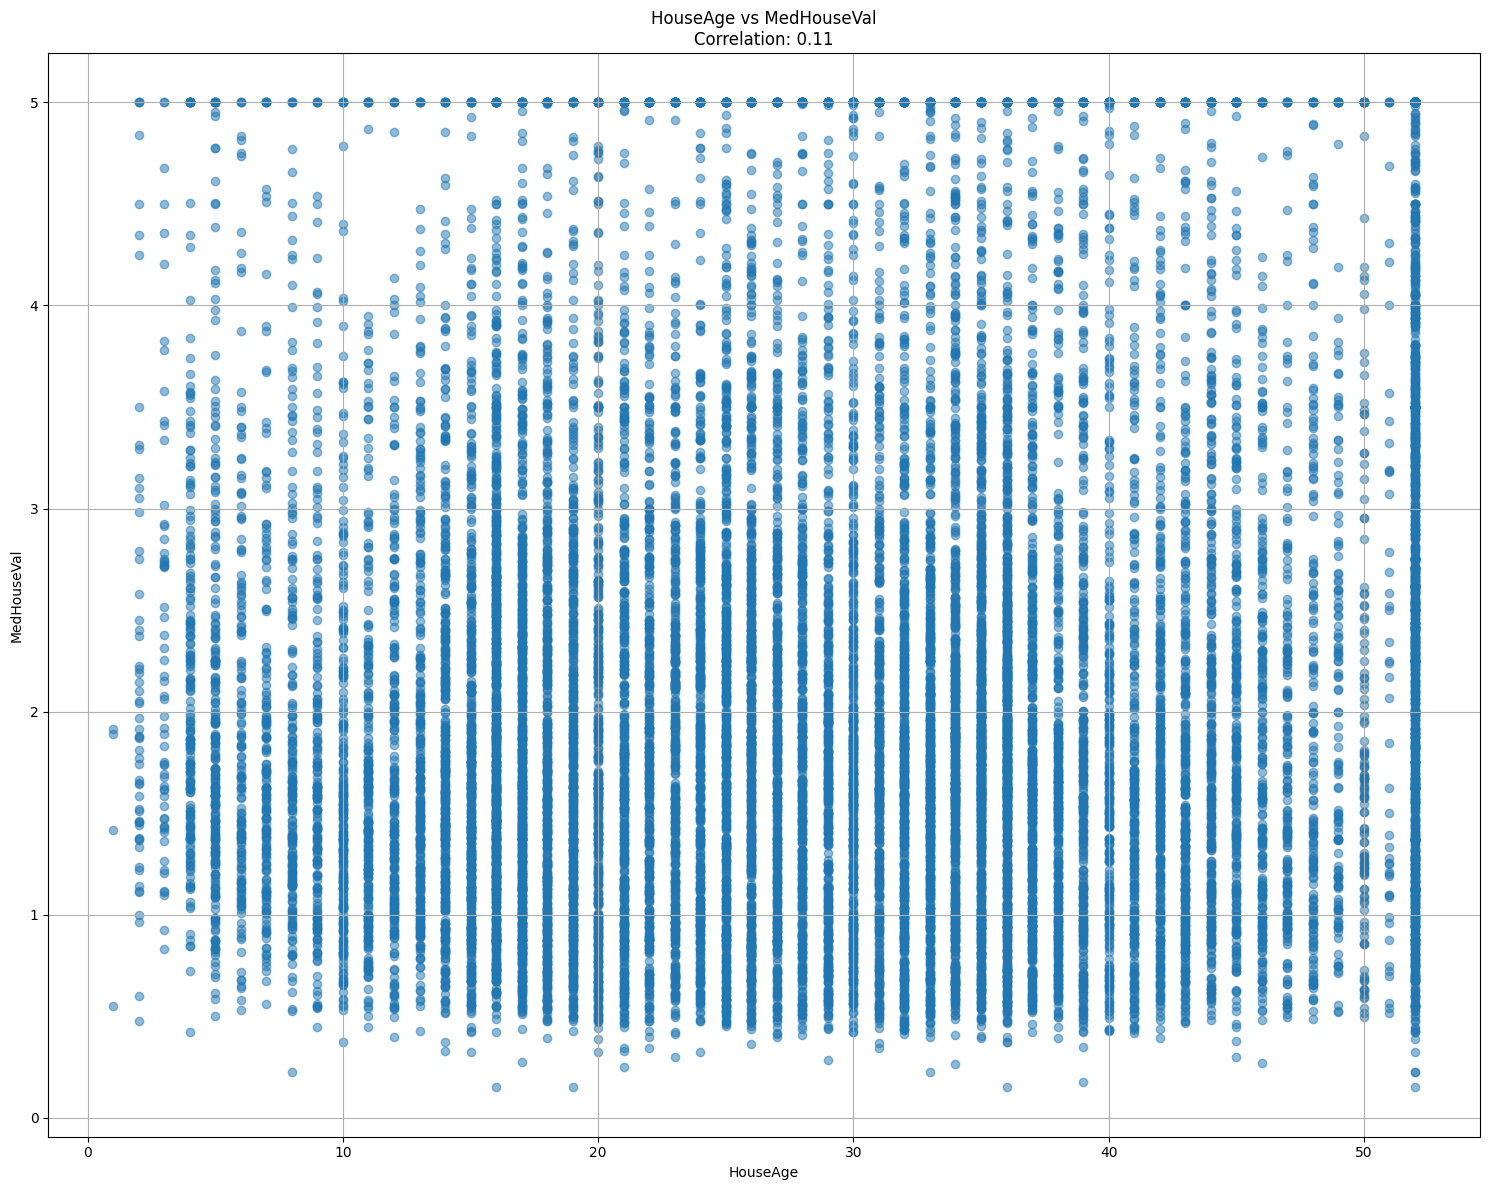

In [ ]:
# Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal
print("Scatter plots of MedHousVal vs MedInc")
plot_features_vs_target(df, 'MedInc',target='MedHouseVal')
print()
print("Scatter plots of MedHousVal vs AveRooms")
plot_features_vs_target(df, 'AveRooms',target='MedHouseVal')
print()
print("Scatter plots of MedHousVal vs AveOccup")
plot_features_vs_target(df, 'AveOccup',target='MedHouseVal')
print()
print("Scatter plots of MedHousVal vs HouseAge")
plot_features_vs_target(df, 'HouseAge',target='MedHouseVal')



In [ ]:
# Model Training
# Split the dataset into training and testing sets
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Choose an appropraite training algorithm
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print (model.intercept_)


-37.02327770606409


In [ ]:
# Model Evaluation
r2_score(y_test, model.predict(X_test))
print("R-squared (R2) Score:", r2_score(y_test, model.predict(X_test)))

mean_squared_error(y_test, model.predict(X_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, model.predict(X_test)))

R-squared (R2) Score: 0.5757877060324508
Mean Squared Error (MSE): 0.5558915986952444


In [ ]:
# Model Prediction
# Predict Median House Value from a new set of feature inputs.
'''Example new data: 'MedInc' = 3,
                     'HouseAge' = 30,
                     'AveRooms' = 6,
                     'AveOccup' = 3,
                     'Latitude' = 34,
                     'Longitude' = -118,
                     'AveBedrms' = 1,
                     'Population' = 1500
  '''
'''
features order = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']'''
features = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])
prediction = model.predict(features)
print(prediction)


[1.54866333]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
